## Use Selenium to Scrape Top Influencer User Id's

In [1]:
# # https://towardsdatascience.com/how-to-use-selenium-to-web-scrape-with-example-80f9b23a843a
# from selenium import webdriver
# # pip3 install chromedriver-binary
# import chromedriver_binary

In [2]:
# driver = webdriver.Chrome()

In [3]:
# driver.get('https://www.instagram.com/directory/profiles/')

In [4]:
# driver.find_element_by_xpath("""//*[@id="react-root"]/section/main/div/div[2]/div/ul[1]/li[1]/a""").click()

In [5]:
# driver.find_element_by_xpath("""//*[@id="react-root"]/section/main/div[1]/div[2]/div/ul[1]/li[1]/a""").click()

In [6]:
# posts = driver.find_elements_by_class_name('_7kTyW')

In [7]:
# user_ids = []
# for post in posts:
#     user_ids.append(post.text)

In [8]:
# driver.back()

In [9]:
# driver.find_element_by_xpath("""//*[@id="react-root"]/section/main/div/div[2]/div/ul[1]/li[2]/a""").click()

In [10]:
# posts = driver.find_elements_by_class_name('_7kTyW')

In [11]:
# for post in posts:
#     user_ids.append(post.text)

In [12]:
# len(user_ids)

In [13]:
# driver.back()

## Automate scrapping using loops to get user_id's

In [14]:
# from: https://www.instagram.com/directory/profiles/

In [15]:
# main_dir1 = [str(x) for x in range(1,5)]
# main_dir2 = [str(x) for x in range(1,26)]
# sub_dir1 = [str(x) for x in range(1,5)]
# sub_dir2 = [str(x) for x in range(1,4)]

In [16]:
# def main_dir_str(x, y):
#     """
#     Returns string for the argument in method driver.find_element_by_xpath()
    
#     Input: x, y strings for xpath locations on https://www.instagram.com/directory/profiles/
#     Output: string for xpath
#     """
#     return """//*[@id="react-root"]/section/main/div/div[2]/div/ul[""" + x + """]/li[""" + y + """]/a"""

# def sub_dir_str(x, y):
#     """
#     Returns string for the argument in method driver.find_element_by_xpath()
    
#     Input: x, y strings for xpath locations on https://www.instagram.com/directory/profiles/<sub dir #>/
#     Output: string for xpath
#     """
#     if x == '4':
#         return """//*[@id="react-root"]/section/main/div/div[2]/div/ul[4]/li/a"""
#     else:
#         return """//*[@id="react-root"]/section/main/div/div[2]/div/ul[""" + x + """]/li[""" + y + """]/a"""

In [17]:
# import random
# random.randint(6,10)/10

In [18]:
# import time
# import random
# user_ids = []
# for x_main in main_dir1:
#     for y_main in main_dir2:
#         driver.get('https://www.instagram.com/directory/profiles/')
#         driver.find_element_by_xpath(main_dir_str(x_main, y_main)).click()
#         for x_sub in sub_dir1:
#             for y_sub in sub_dir2:
#                 time.sleep(random.randint(6,10)/10)
#                 driver.find_element_by_xpath(sub_dir_str(x_sub, y_sub)).click()
#                 time.sleep(random.randint(6,10)/10)
#                 posts = driver.find_elements_by_class_name('_7kTyW')
#                 for post in posts:
#                     user_ids.append(post.text)
#                 driver.back()

In [19]:
# len(user_ids)

In [20]:
# unique, counts = np.unique(user_ids, return_counts = True)

In [21]:
# len(counts)

In [22]:
# len(unique)

In [23]:
# unique[1]

In [24]:
# user_ids[-1]

In [25]:
# type(unique)

## Save Unique User Id's as .csv

In [26]:
# from numpy import savetxt

In [27]:
# savetxt('user_ids.csv'
#         , unique
#         , delimiter = ','
#         , fmt = '%s'
#        )

## Load Unique User Id's

In [1]:
from numpy import loadtxt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
unique_ids = loadtxt('user_ids.csv'
                     , delimiter = '\n'
                     , dtype = str
                    )

In [3]:
type(unique_ids)

numpy.ndarray

In [4]:
len(unique_ids)

100000

## Data for Multiple Users

In [5]:
from instaloader import *
from instaloader import Instaloader as insta

In [6]:
# instaloader from https://instaloader.github.io/module/structures.html?highlight=get_followers#instaloader.Profile.get_followers

In [7]:
def download_instaloader(lst):
    """
    Returns list of dictonaries of user profile information
    Input: lst, list of user id strings
    Output: lst, list of user id string
            lst_dict, list of user profile dictionary
    """
    import instaloader
    import time
    import random
    bot = instaloader.Instaloader()
    # for private profiles
    bot.login('your_insta_acct_username'
              , 'your_insta_acct_pass'
             )
    lst_dict = []
    name_lst = []
    for userid in lst:
        try:
            name_lst.append(userid)
            time.sleep(random.randint(3,9)/10)
            profile = Profile.from_username(bot.context, userid)
            lst_dict.append({'user_name': profile.username
                              , 'user_id': profile.userid
                              , 'private': profile.is_private
                              , 'followed': profile.followed_by_viewer
                              , 'post_count': profile.mediacount
                              , 'igtv_count': profile.igtvcount
                              , 'followers_count': profile.followers
                              , 'following_count': profile.followees
                              , 'external_url': profile.external_url
                              , 'business_acct': profile.is_business_account
                              , 'business_cat': profile.business_category_name
                              , 'bio': profile.biography
                              , 'blocked_by_viewers': profile.blocked_by_viewer
                              , 'follows': profile.follows_viewer
                              , 'full_name': profile.full_name
                              , 'blocked_viewers': profile.has_blocked_viewer
                              , 'public_story': profile.has_public_story
                              , 'requested_viewer': profile.has_requested_viewer
                              , 'profile_pic_url': profile.profile_pic_url
                              , 'similar_accounts': {x for x in profile.get_similar_accounts()}
                             })
        except:
            name_lst.remove(userid)
            continue
    return name_lst, lst_dict 

In [8]:
# A&E 100 Fashion Influencers from: https://www.amraandelma.com/100-top-fashion-influencers-in-2020/
ae_list = ['COLESPROUSE'
, 'CHIARAFERRAGNI'
, 'CAMILACOELHO'
, 'LAURENCONRAD'
, 'AIMEESONG'
, 'NEGIN_MIRSALEHI'
, 'SINCERELYJULES'
, 'OLIVIAPALERMO'
, 'ALEXACHUNG'
, 'KARENWAZEN'
, 'CARODAUR'
, 'LEONIEHANNE'
, 'WEWOREWHAT'
, 'LENAPERMINOVA'
, 'IAMGALLA'
, 'NICOLEWARNE'
, 'IRENEISGOOD'
, 'IMJENNIM'
, 'BLAIREADIEBEE'
, 'XENIAADONTS'
, 'JEANNEDAMAS'
, 'CHRISELLELIM'
, 'JULIABEROLZHEIMER'
, 'XENIA'
, 'MARGARET__ZHANG'
, 'GALAGONZALEZ'
, 'MVB'
, 'WENDYSLOOKBOOK'
, 'HELENABORDON'
, 'LEANDRAMCOHEN'
, 'KAITLYNN'
, 'MIAMIAMINE'
, 'CAMILLECHARRIERE'
, 'GIOVANNAENGELBERT'
, 'THEPACMAN82'
, 'CLUBFASHIONISTA'
, 'GABIFRESH'
, 'GARANCEDORE'
, 'ELMABEGANOVICH'
, 'ICONACCIDENTAL'
, 'COLORMECOURTNEY'
, 'ELLE_FERGUSON'
, 'RUMINEELY'
, 'NIMABENATI'
, 'EMMAHILL'
, 'BRYANBOYCOM' # doesn't work
, 'CANDELA_________'
, 'BIANCABRANDOLINI'
, 'SUSIEBUBBLE'
, 'ERIKA_BOLDRIN'
, 'MARYCAKE'
, 'ALEALIMAY'
, 'NYCBAMBI'
, 'NEWDARLINGS'
, 'MIRANDAMAKAROFF'
, 'YOYOKULALA'
, 'LEOMIEANDERSON'
, 'STYLEMEMAEVE'
, 'DEBORABROSA'
, 'SOPHIAROE'
, 'MAJAWYH'
, 'HEIR'
, 'ALEXANDRALAPP_'
, 'GRECEGHANEM'
, 'TINALEUNG'
, 'ASIYAMI_GOLD'
, 'TAMUMCPHERSON'
, 'OLJARYZ'
, '_JEANETTEMADSEN_'
, 'INESDELAFRESSANGEOFFICIAL'
, 'AMINAMUADDI'
, 'NIKITADMADHANI'
, 'LIFEOFBOHEME'
, 'SHINI.PARK'
, 'PANDORASYKES'
, 'MATTHEWZORPAS'
, 'NICOLETTEMASON'
, 'DOUBLE3XPOSURE'
, 'MONIKH'
, 'THEFRUGALITY'
, 'LEFEVREDIARY'
, 'THENOTORIOUSKIA'
, 'MADELYNNFURLONG'
, 'KARENBRITCHICK'
, 'THELITTLEMAGPIE'
, 'BIGHAIRLOUDMOUTH'
, 'CHRISSYFORD'
, 'CARLOTTAODDI'
, 'TYLYNNNGUYEN'
, 'STEPHANIEBROEK'
, 'ITSMEKELLIEB'
, 'STYLISHCURVES'
, 'GUIZIOO'
, 'STEPHANIEYEBOAH'
, 'GEMMATALBOT'
, 'KERRYPIERI'
, 'INFLUENCINGINCOLOR'
, 'CLAIRE_MOST'
, 'ARIADIBARI'
, 'PRETTYPROPERQUAINT']
len(ae_list)

100

In [9]:
# Download data for A&E Top 100 Influencers
name_lst, lst_dict = download_instaloader(ae_list)

JSON Query to bryanboycom/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to bryanboycom/feed/: 404 Not Found [retrying; skip with ^C]



Too many queries in the last time. Need to wait 34 seconds, until 09:44.


JSON Query to prettyproperquaint/feed/: 429 Too Many Requests [retrying; skip with ^C]
Requests within last 10/11/20/22/30/60 minutes grouped by type:
 *                            other:   66   74  103  103  103  103
   9ca88e465c3f866a76f7adee3871bdd8:   61   69   98   98   98   98
                             iphone:   61   69   98   98   98   98
   ad99dd9d3646cc3c0dda65debcd266a7:   62   69   98   98   98   98
Instagram responded with HTTP error "429 - Too Many Requests". Please
do not run multiple instances of Instaloader in parallel or within
short sequence. Also, do not use any Instagram App while Instaloader
is running.
The request will be retried in 7 seconds, at 09:48.
JSON Query to prettyproperquaint/feed/: 429 Too Many Requests [retrying; skip with ^C]
Requests within last 10/11/20/22/30/60 minutes grouped by type:
 *                            other:   66   74  104  104  104  104
   9ca88e465c3f866a76f7adee3871bdd8:   61   68   98   98   98   98
                          

In [11]:
len(name_lst), len(lst_dict)

(98, 98)

In [12]:
df_ae_100 = pd.DataFrame({'user_id': name_lst
                        , 'profile': lst_dict
                       }
                      )
df_ae_100 = df_ae_100.profile.apply(pd.Series)
df_ae_100.head(3)

,user_name,user_id,private,followed,post_count,igtv_count,followers_count,following_count,external_url,business_acct,business_cat,bio,blocked_by_viewers,follows,full_name,blocked_viewers,public_story,requested_viewer,profile_pic_url,similar_accounts
0,colesprouse,1363484236,False,False,1071,0,33403891,611,None,False,None,Please buy my essential oils. @camera_duels is...,False,False,Cole Sprouse,False,True,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile vanessamorgan (179431427)>, <Profile..."
1,chiaraferragni,19769622,False,False,13722,24,21927787,1219,https://www.douglas.it/Lanc%C3%B4me/LANC%C3%94...,False,None,Leo’s mama and digital entrepreneur Boss baby....,False,False,Chiara Ferragni ✨,False,True,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile lucavezil (230859777)>, <Profile mar..."
2,camilacoelho,16303346,False,False,11083,21,8895400,996,https://linktr.ee/Camila_Coelho,False,None,Share LOVE wherever you go!\nFounder @elaluz &...,False,False,CAMILA COELHO,False,True,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile silviabraz (13589512)>, <Profile mat..."


In [13]:
df_ae_100.isna().sum()

user_name              0
user_id                0
private                0
followed               0
post_count             0
igtv_count             0
followers_count        0
following_count        0
external_url          12
business_acct          0
business_cat          72
bio                    0
blocked_by_viewers     0
follows                0
full_name              0
blocked_viewers        0
public_story           0
requested_viewer       0
profile_pic_url        0
similar_accounts       0
dtype: int64

In [14]:
df_ae_100.fillna('None'
                 , inplace = True
                )
df_ae_100.isna().sum()

user_name             0
user_id               0
private               0
followed              0
post_count            0
igtv_count            0
followers_count       0
following_count       0
external_url          0
business_acct         0
business_cat          0
bio                   0
blocked_by_viewers    0
follows               0
full_name             0
blocked_viewers       0
public_story          0
requested_viewer      0
profile_pic_url       0
similar_accounts      0
dtype: int64

In [15]:
df_ae_100.to_csv('./data/df_ae_100.csv')

## Similar Accounts

In [16]:
df_ae_100.similar_accounts.iloc[0]

{<Profile addisonraee (304358009)>,
 <Profile aidanrgallagher (1441640189)>,
 <Profile alishaboe (53920838)>,
 <Profile amybethmcnulty (2281529693)>,
 <Profile archiecomics (299325029)>,
 <Profile arianagrande (7719696)>,
 <Profile aron.piper (942821982)>,
 <Profile ashleytisdale (14734199)>,
 <Profile avani (220252994)>,
 <Profile billieeilish (28527810)>,
 <Profile brycehall (1449154051)>,
 <Profile camila_cabello (19596899)>,
 <Profile camilo (41217567)>,
 <Profile camimendes (3248600900)>,
 <Profile charlidamelio (183250726)>,
 <Profile chrishemsworth (1822594644)>,
 <Profile dannapaola (7584726)>,
 <Profile ddlovato (189393625)>,
 <Profile debbyryan (9429520)>,
 <Profile dixiedamelio (174530045)>,
 <Profile dovecameron (145312309)>,
 <Profile dualipa (12331195)>,
 <Profile dylansprouse (181996286)>,
 <Profile ester_exposito (386189519)>,
 <Profile finnwolfhardofficial (3172510187)>,
 <Profile gigihadid (12995776)>,
 <Profile harrystyles (144605776)>,
 <Profile hero_ft (455377598)>

## A&E Top 100 Exploration

In [17]:
df_ae_100.columns

Index(['user_name', 'user_id', 'private', 'followed', 'post_count',
       'igtv_count', 'followers_count', 'following_count', 'external_url',
       'business_acct', 'business_cat', 'bio', 'blocked_by_viewers', 'follows',
       'full_name', 'blocked_viewers', 'public_story', 'requested_viewer',
       'profile_pic_url', 'similar_accounts'],
      dtype='object')

In [18]:
df_ae_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_name           98 non-null     object
 1   user_id             98 non-null     int64 
 2   private             98 non-null     bool  
 3   followed            98 non-null     bool  
 4   post_count          98 non-null     int64 
 5   igtv_count          98 non-null     int64 
 6   followers_count     98 non-null     int64 
 7   following_count     98 non-null     int64 
 8   external_url        98 non-null     object
 9   business_acct       98 non-null     bool  
 10  business_cat        98 non-null     object
 11  bio                 98 non-null     object
 12  blocked_by_viewers  98 non-null     bool  
 13  follows             98 non-null     bool  
 14  full_name           98 non-null     object
 15  blocked_viewers     98 non-null     bool  
 16  public_story        98 non-n

In [19]:
df_ae_100.describe()

,user_id,post_count,igtv_count,followers_count,following_count
count,9.800000e+01,98.000000,98.000000,9.800000e+01,98.000000
mean,4.690684e+08,3875.285714,13.704082,1.675334e+06,1318.489796
std,1.485081e+09,3072.908817,22.327095,4.187624e+06,1150.752969
min,1.237191e+06,42.000000,0.000000,3.570000e+04,4.000000
25%,9.556582e+06,1675.250000,1.000000,2.557178e+05,712.250000
50%,2.235591e+07,3235.000000,5.000000,5.162350e+05,992.500000
75%,1.934312e+08,4918.750000,18.750000,1.205482e+06,1469.250000
max,8.628689e+09,15684.000000,153.000000,3.340389e+07,6370.000000


In [23]:
df_ae_100.bio.iloc[3]

'Lifestyle at @laurenconradco \nDesigner for @lclaurenconrad and @lclittleco \nCo-founder of @thelittlemarket \nBeauty at @laurenconradbeauty'

In [11]:
# 150:300 Updated 11/17/2020...only 150 downloads per day
# Change [150:300] to [300:450] on 11/19/2020
name_lst, lst_dict = download_instaloader(unique_ids[150:300])

JSON Query to 0_arie_00/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 0_arie_00/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 0_doctor_0_/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0_doctor_0_/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0_yasmim_0/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0_yasmim_0/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0abs__/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0abs__/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0b89h/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0b89h/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0buy_followers0/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0buy_followers0/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0bv_.ps.b.done/feed/: 404 Not Found [retrying; skip with ^C]
J


Too many queries in the last time. Need to wait 330 seconds, until 15:48.


JSON Query to 0fficial.dno/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0fficial.dno/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0fficial.rowan/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0fficial.rowan/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0fficial_yogi_/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0fficial_yogi_/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0glu4/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0glu4/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0ilz9_/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0ilz9_/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0iqq7/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 0iqq7/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]



Too many queries in the last time. Need to wait 16 seconds, until 15:51.


JSON Query to 0l.y9/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0l.y9/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0l2.ni/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0l2.ni/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0lll0lll0lll0lll/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0lll0lll0lll0lll/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0lo200k/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0lo200k/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0med_4x4/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0med_4x4/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0mxr8/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0mxr8/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0nlyfanxs/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0nlyfanxs/feed/: 404 Not Found [retrying; skip with ^C]



Too many queries in the last time. Need to wait 312 seconds, until 15:59.


JSON Query to 0o88968/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 0o88968/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 0pameoff/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0pameoff/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0q0._m/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0q0._m/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0sajad_qasim/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0sajad_qasim/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0scandal/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0scandal/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0vsimith/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0vsimith/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0x.vjl/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0x.vjl/fe


Too many queries in the last time. Need to wait 222 seconds, until 16:10.


JSON Query to 1.2ug/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1.2ug/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1.9wwi/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1.9wwi/feed/: 404 Not Found [retrying; skip with ^C]


In [12]:
len(name_lst), len(lst_dict)

(117, 117)

In [13]:
# 150 is the max number for data downloads per day
# Change df_150_300 to df_300_450 on 11/19/2020

df_150_300 = pd.DataFrame({'user_id': name_lst
                        , 'profile': lst_dict
                       }
                      )
df_150_300 = df_150_300.profile.apply(pd.Series)
df_150_300.head(3)

,user_name,user_id,private,followed,post_count,igtv_count,followers_count,following_count,external_url,business_acct,business_cat,bio,blocked_by_viewers,follows,full_name,blocked_viewers,public_story,requested_viewer,profile_pic_url,similar_accounts
0,0_1js,7601073256,False,False,3,0,30316,7,None,False,None,‏همَ ألنآس موجُودين ، بس جيب أليريح البآل ،,False,False,,False,False,False,https://instagram.fptp2-1.fna.fbcdn.net/v/t51....,"{<Profile jayreubens (12184680070)>, <Profile ..."
1,0___l2,1663780479,False,False,0,0,22614,1556,http://tellonym.me/eng_1999/,False,None,- ℱℛ𝒪ℳ 𝒜𝒩𝒪𝒯ℋℰℛ 𝒫ℒ𝒜𝒩ℰ𝒯 📍\n- 6|𝙵𝙴𝙱𝚁𝚄𝙰𝚁𝚈🎂\n- ( 𝕌...,False,False,,False,True,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile jayreubens (12184680070)>, <Profile ..."
2,0__shila__0,6473773787,True,False,9,0,69524,289,None,False,None,‌‌,False,False,,False,False,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile jayreubens (12184680070)>, <Profile ..."


In [14]:
df_150_300.isna().sum()

user_name               0
user_id                 0
private                 0
followed                0
post_count              0
igtv_count              0
followers_count         0
following_count         0
external_url          102
business_acct           0
business_cat           90
bio                     0
blocked_by_viewers      0
follows                 0
full_name               0
blocked_viewers         0
public_story            0
requested_viewer        0
profile_pic_url         0
similar_accounts        0
dtype: int64

In [15]:
df_150_300.fillna('None', inplace = True)
df_150_300.isna().sum()

user_name             0
user_id               0
private               0
followed              0
post_count            0
igtv_count            0
followers_count       0
following_count       0
external_url          0
business_acct         0
business_cat          0
bio                   0
blocked_by_viewers    0
follows               0
full_name             0
blocked_viewers       0
public_story          0
requested_viewer      0
profile_pic_url       0
similar_accounts      0
dtype: int64

In [16]:
df_150_300.shape

(117, 20)

In [21]:
# Save and test load
df_150_300.to_csv('./data/df_150_300.csv'
                , encoding='utf-8'
                , index = False
               )
df_150_300_test = pd.read_csv('./data/df_150_300.csv'
                            , encoding='utf-8'
                           )
df_150_300_test.shape

(117, 20)

In [18]:
# validate save and test load
df_150_300.info(), df_150_300_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_name           117 non-null    object
 1   user_id             117 non-null    int64 
 2   private             117 non-null    bool  
 3   followed            117 non-null    bool  
 4   post_count          117 non-null    int64 
 5   igtv_count          117 non-null    int64 
 6   followers_count     117 non-null    int64 
 7   following_count     117 non-null    int64 
 8   external_url        117 non-null    object
 9   business_acct       117 non-null    bool  
 10  business_cat        117 non-null    object
 11  bio                 117 non-null    object
 12  blocked_by_viewers  117 non-null    bool  
 13  follows             117 non-null    bool  
 14  full_name           117 non-null    object
 15  blocked_viewers     117 non-null    bool  
 16  public_story        117 no

(None, None)

## Check bio nulls...

In [19]:
df_150_300_test[df_150_300_test.bio.isna()]['bio'].index

Int64Index([9, 12, 17, 18, 20, 22, 23, 28, 35, 40, 47, 59, 62, 67, 82, 87, 89,
            92, 97, 107],
           dtype='int64')

In [20]:
df_150_300_test.bio.iloc[9]

nan

## Check full_name nulls...

In [22]:
df_150_300_test[df_150_300_test.full_name.isna()]['full_name'].index

Int64Index([  0,   1,   2,   5,   7,  16,  17,  20,  21,  23,  30,  35,  40,
             45,  46,  47,  60,  62,  67,  80,  82,  85,  88,  94, 105],
           dtype='int64')

In [24]:
df_150_300_test.full_name.iloc[0]

nan

In [26]:
df_150_300_test.fillna('None'
                     , inplace = True
                    )

In [27]:
df_150_300_test.isna().sum()

user_name             0
user_id               0
private               0
followed              0
post_count            0
igtv_count            0
followers_count       0
following_count       0
external_url          0
business_acct         0
business_cat          0
bio                   0
blocked_by_viewers    0
follows               0
full_name             0
blocked_viewers       0
public_story          0
requested_viewer      0
profile_pic_url       0
similar_accounts      0
dtype: int64

## Combine Data Frames from Pervious 

In [34]:
df_1_150 = pd.read_csv('./data/df_1_150.csv')
df_1_150.fillna('None'
                , inplace = True
               )
df_1_150.shape

(122, 20)

In [35]:
# combine df with pervious dataframes
df = df_1_150.append(df_150_300)
df.shape

(239, 20)

In [36]:
# check for nulls
df.isna().sum()

user_name             0
user_id               0
private               0
followed              0
post_count            0
igtv_count            0
followers_count       0
following_count       0
external_url          0
business_acct         0
business_cat          0
bio                   0
blocked_by_viewers    0
follows               0
full_name             0
blocked_viewers       0
public_story          0
requested_viewer      0
profile_pic_url       0
similar_accounts      0
dtype: int64

In [37]:
df.to_csv('./data/df.csv')

## EDA of Data Collected

In [38]:
df = pd.read_csv('./data/df.csv')
df.fillna('None'
          , inplace = True
         )

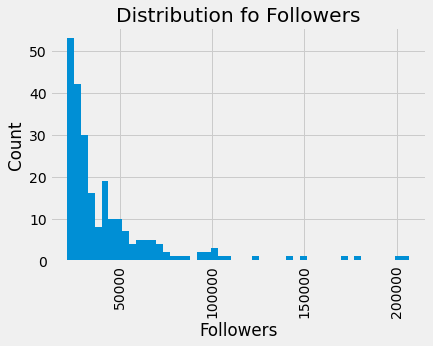

In [39]:
df.followers_count.hist(bins=50
                        , log = False
                       )
plt.xticks(rotation=90)
plt.title('Distribution fo Followers')
plt.ylabel('Count')
plt.xlabel('Followers');

In [24]:
df.head()

NameError: name 'df' is not defined